### 필수 함수

In [260]:
#엑셀 파일 불러오는 함수
import pandas as pd

def load_and_clean_data(filepath, header):
    df = pd.read_excel(filepath, header = header)

    new_columns = []
    for col in df.columns:
        merged_name = [str(c) for c in col if 'Unnamed' not in str(c)]
        new_columns.append(' '.join(merged_name).strip())

    df.columns = new_columns
    df= df.fillna(method='ffill', axis=0)

    return df

In [261]:
def clean_col_name(df, cols):
    df = df.copy()
    for col in cols:
        df[col] = (
            df[col]
            .astype(str)                                   # NaN 대비
            .str.replace('·', '', regex=False)
            .str.replace('・', '', regex=False)
            .str.replace('?', '', regex=False)
            .str.strip()
            .str.replace(' ', '', regex=False)             # 모든 띄어쓰기 제거
        )
    return df

In [262]:
# import re
# import unicodedata as ud
# import pandas as pd

# def _normalize_one(x: str, remove_all_spaces: bool = False) -> str:
#     if x is None:
#         return ""
#     s = str(x)

#     # 1) 유니코드 정규화 (전각/반각 통일)
#     s = ud.normalize("NFKC", s)

#     # 2) 보이지 않는 문자/특수 공백 제거
#     #    제로폭 공백, soft hyphen, BOM 등
#     s = re.sub(r"[\u200b\u200c\u200d\u2060\u00ad\ufeff]", "", s)

#     # 3) NBSP/전각 공백 → 일반 공백
#     s = s.replace("\u00A0", " ").replace("\u3000", " ")

#     # 4) 특정 기호 제거/치환
#     s = s.replace("·", "").replace("・", "").replace("?", "")

#     # 5) 하이픈/언더바 변형 통일
#     #    다양한 하이픈류 → 보통 '-'로, 전각 언더바(FF3F) → '_'
#     s = re.sub(r"[\u2010\u2011\u2012\u2013\u2014\u2212]", "-", s)  # hyphen-like
#     s = s.replace("\uFF3F", "_")  # FULLWIDTH LOW LINE → '_'

#     # 6) 언더바/괄호/하이픈 주변 공백 제거
#     #    " ) _ " → ")_", "( _" → "(_", "- "→"-", " -"→"-"
#     s = re.sub(r"\s*_\s*", "_", s)            # 언더바 주변 공백 완전 제거
#     s = re.sub(r"\s+([)\]-])", r"\1", s)      # 기호 앞 공백 제거
#     s = re.sub(r"([(\[-])\s+", r"\1", s)      # 기호 뒤 공백 제거

#     # 7) 좌우 공백 정리 + 내부 공백 정책
#     s = s.strip()
#     if remove_all_spaces:
#         s = re.sub(r"\s+", "", s)             # 모든 공백 제거
#     else:
#         s = re.sub(r"\s+", " ", s)            # 연속 공백을 1개로

#     return s

# def clean_col_name(df: pd.DataFrame, cols, remove_all_spaces: bool = False) -> pd.DataFrame:
#     df = df.copy()
#     for col in cols:
#         df.loc[:, col] = df[col].astype(str).map(lambda v: _normalize_one(v, remove_all_spaces))
#     return df


### 투입

In [263]:
#신입생 충원율 및 경쟁률
freshman_df = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2023년 _대학_4-다. 신입생 충원 현황_학교별자료.xlsx", [3,4,5])

freshman_df['기준연도'] = freshman_df['기준연도'].astype(int)

freshman_df_selected = freshman_df[['기준연도', '학교종류', '설립구분', '지역', '상태', '학교','정원내\n신입생 충원율(%)\n(D/B) × 100', '경쟁률\n(C/B)']].copy()
freshman_df_selected.rename(columns = {'정원내\n신입생 충원율(%)\n(D/B) × 100' : '신입생 충원율', '경쟁률\n(C/B)' : '신입생 경쟁률'}, inplace = True)

freshman_df_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_7516\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,학교종류,설립구분,지역,상태,학교,신입생 충원율,신입생 경쟁률
0,2023,대학교,사립,경남,기존,가야대학교(김해),82.2,6.8
1,2023,대학교,사립,경기,기존,가천대학교,100.0,16.8
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,60.4,3.7
3,2023,대학교,사립,충북,기존,가톨릭꽃동네대학교,97.3,7.5
4,2023,대학교,사립,경기,기존,가톨릭대학교,99.9,13.2


In [264]:
#외국인 학생 수
foreign_df = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2023년 _대학_4-바-1. 외국학생 현황_학교별자료.xlsx", [3,4,5,6])

foreign_df['기준연도'] = foreign_df['기준연도'].astype(int)

foreign_df_selected = foreign_df[['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '계\n(D=A+B+C)']]
foreign_df_selected.rename(columns = {'계\n(D=A+B+C)' : '외국인 학생수'}, inplace = True)

foreign_df_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_7516\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)
C:\Users\윤서현\AppData\Local\Temp\ipykernel_7516\4272067660.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreign_df_selected.rename(columns = {'계\n(D=A+B+C)' : '외국인 학생수'}, inplace = True)


,기준연도,학교종류,설립구분,지역,상태,학교,외국인 학생수
0,2023,대학교,사립,경남,기존,가야대학교(김해),17
1,2023,대학교,사립,경기,기존,가천대학교,2743
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,83
3,2023,대학교,사립,충북,기존,가톨릭꽃동네대학교,2
4,2023,대학교,사립,경기,기존,가톨릭대학교,815


### 관리

In [265]:
#재학생충원율
fte_df = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2023년 _대학_4-라-1. 재학생 충원율_학교별자료.xlsx",[3,4])
fte_df_2 = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_4-라-1. 재학생 충원율_학교별자료.xlsx",[3,4])

fte_df_first = fte_df[fte_df['기준연도'] == '2023 년 상반기']
fte_df_sec = fte_df_2[fte_df_2['기준연도'] == '2023 년 하반기']

fte_df_first_selected = fte_df_first[['기준연도','학교종류','설립구분','지역','상태','학교','학생정원(A)','재학생 계(C)','재학생 정원내(D)','정원내 재학생 충원율(%){D/(A-B)}\nX100']].copy()
fte_df_sec_selected = fte_df_sec[['기준연도','학교종류','설립구분','지역','상태','학교','학생정원(A)','재학생 계(C)','재학생 정원내(D)','정원내 재학생 충원율(%){D/(A-B)}\nX100']].copy()

# 두 DataFrame을 수직 결합
fte_df_final = pd.concat([fte_df_first_selected, fte_df_sec_selected], ignore_index=True)

# 기준연도에서 연도(숫자)만 추출
fte_df_final['연도'] = fte_df_final['기준연도'].str.extract(r'(\d{4})')
fte_df_final['연도'] = fte_df_final['연도'].astype(int)

# 연도 및 학교 기준으로 평균 계산
fte_df_final = fte_df_final.groupby(['연도', '학교'])[
    ['정원내 재학생 충원율(%){D/(A-B)}\nX100']
].mean().reset_index()

fte_df_final.rename(columns = {'정원내 재학생 충원율(%){D/(A-B)}\nX100' : '재학생 충원율'}, inplace = True)

fte_df_final.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_7516\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)
C:\Users\윤서현\AppData\Local\Temp\ipykernel_7516\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,연도,학교,재학생 충원율
0,2023,가야대학교(고령) _제2캠퍼스,0.00
1,2023,가야대학교(김해),75.75
2,2023,가천대학교,96.95
3,2023,가톨릭관동대학교,68.75
4,2023,가톨릭꽃동네대학교,89.50


In [266]:
#중도탈락률
drop_df = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_4-사. 중도탈락 학생 현황_학교별자료.xlsx", [3,4])

drop_df['기준연도'] = drop_df['기준연도'].astype(int)

drop_df_selected = drop_df[['기준연도', '학교종류', '설립구분', '지역', '상태', '학교','재적학생\n(A)','중도탈락학생비율(%)\n(B/A) × 100']].copy()
drop_df_selected.rename(columns = {'중도탈락학생비율(%)\n(B/A) × 100' : '중도탈락률','재적학생\n(A)' : '재적학생'}, inplace = True)

drop_df_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_7516\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,학교종류,설립구분,지역,상태,학교,재적학생,중도탈락률
0,2023,대학교,사립,경남,기존,가야대학교(김해),2153,9.6
1,2023,대학교,사립,경기,기존,가천대학교,27102,3.6
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,9398,9.2
3,2023,대학교,사립,충북,기존,가톨릭꽃동네대학교,554,5.2
4,2023,대학교,사립,경기,기존,가톨릭대학교,9546,3.8


In [267]:
#전임교원확보율(정원내)
get_profes_df = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2023년 _대학_6-나-(1). 전임교원 1인당 학생 수 및 전임교원 확보율_학교별자료.xlsx", [3,4,5,6])

get_profes_df['기준연도'] = get_profes_df['기준연도'].astype(int)

get_profes_df_selected = get_profes_df[['기준연도', '학교종류', '설립구분', '지역', '상태정보', '학교', '전임교원 확보율 학생정원\n기준(B/Cx100)',]].copy()
#'학생현황 학부 학생정원', '학생현황 학부 재학생', '전임교원 확보율 재학생\n기준(B`/C`x100)'
get_profes_df_selected.rename(columns = {'전임교원 확보율 학생정원\n기준(B/Cx100)' : '전임교원확보율'}, inplace = True)
get_profes_df_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_7516\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,학교종류,설립구분,지역,상태정보,학교,전임교원확보율
0,2023,대학교,사립,경북,기존,가야대학교(고령) _제2캠퍼스,0.00
1,2023,대학교,사립,경남,기존,가야대학교(김해),71.03
2,2023,대학교,사립,경기,기존,가천대학교,103.76
3,2023,대학교,사립,강원,기존,가톨릭관동대학교,94.19
4,2023,대학교,사립,충북,기존,가톨릭꽃동네대학교,85.19


In [268]:
#전임교원 강의비율
lecture_df = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2023년 _대학_12-나-2. 교원 강의 담당 비율_학교별자료.xlsx", [3,4,5,6])

lecture_df['기준연도'] = lecture_df['기준연도'].astype(int)
lecture_df_selected = lecture_df[['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '학기','전임교원 비율']].copy()

lecture_avg = (
    lecture_df_selected
    .groupby('학교', as_index=False)['전임교원 비율']
    .mean()
)
lecture_avg.rename(columns ={'전임교원 비율' : '전임교원강의비율'}, inplace = True)
lecture_avg.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_7516\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,학교,전임교원강의비율
0,가야대학교(김해),69.40
1,가천대학교,61.20
2,가톨릭관동대학교,78.20
3,가톨릭꽃동네대학교,72.65
4,가톨릭대학교,59.90


### 재정

In [269]:
#학생1인당교육비
edu_money_national = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_9-나-1. 학생 1인당 교육비(국·공립대, 국립대법인, 특별법국립, 특별법법인)_학교별자료.xlsx", header = [3,4])
edu_money_private = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_9-나-2. 학생 1인당 교육비(사립)_학교별자료.xlsx", header = [3,4])

edu_money_national.rename(columns = {'학생1인당 교육비\n(H=F/G)' : '학생1인당교육비'}, inplace = True)
edu_money_private.rename(columns = {'학생1인당\n교육비(G=E/F)' : '학생1인당교육비'}, inplace = True)

edu_money = pd.concat([edu_money_national, edu_money_private], axis=0)
edu_money['기준연도'] = edu_money['기준연도'].astype(int)

edu_money_selected = edu_money[['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '학생1인당교육비']].copy()
edu_money_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_7516\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)
C:\Users\윤서현\AppData\Local\Temp\ipykernel_7516\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,학교종류,설립구분,지역,상태,학교,학생1인당교육비
0,2023,대학교,국립,강원,기존,강원대학교,22479430.0
1,2023,대학교,국립,강원,기존,강원대학교 _제2캠퍼스,0.0
2,2023,대학교,국립,경남,폐교,경남과학기술대학교,0.0
3,2023,대학교,국립,대구,기존,경북대학교,26453279.1
4,2023,대학교,국립,경남,기존,경상국립대학교,22853576.1


In [270]:
#재학생1인당장학금
scholarship = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_12-다-1. 장학금 수혜 현황_학교별자료.xlsx", header = [3,4,5,6])

scholarship['기준연도'] = scholarship['기준연도'].astype(int)
scholarship_selected = scholarship[['기준연도','설립구분', '지역', '상태', '학교명','재학생 1인당\n장학금\n(D=B/A)']].copy()
scholarship_selected.rename(columns = {'재학생 1인당\n장학금\n(D=B/A)' : '재학생1인당장학금'}, inplace = True)
scholarship_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_7516\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,설립구분,지역,상태,학교명,재학생1인당장학금
0,2023,사립,경남,기존,가야대학교(김해),4000371.0
1,2023,사립,경기,기존,가천대학교,3453285.5
2,2023,사립,강원,기존,가톨릭관동대학교,3753431.8
3,2023,사립,충북,기존,가톨릭꽃동네대학교,5503651.4
4,2023,사립,경기,기존,가톨릭대학교,3274481.5


In [271]:
#등록금
tuition = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2023년 _대학_8-차-1. 등록금 현황_학교별자료.xlsx", header = [3,4] )

tuition['기준연도'] = tuition['기준연도'].astype(int)
tuition_selected = tuition[['기준연도','설립구분','상태','학교','등록금\n(D=B)']]
tuition_selected.rename(columns = {'등록금\n(D=B)': '등록금'}, inplace = True)

tuition_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_7516\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)
C:\Users\윤서현\AppData\Local\Temp\ipykernel_7516\3204769344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuition_selected.rename(columns = {'등록금\n(D=B)': '등록금'}, inplace = True)


,기준연도,설립구분,상태,학교,등록금
0,2023,사립,기존,가야대학교(김해),6833449.7
1,2023,사립,기존,가천대학교,8330044.3
2,2023,사립,기존,가톨릭관동대학교,7185831.2
3,2023,사립,기존,가톨릭꽃동네대학교,7397203.7
4,2023,사립,기존,가톨릭대학교,7071831.5


### 성과

In [272]:
#취업률
rate = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_5-다. 졸업생의 취업 현황_학교별자료.xlsx", header = [3,4,5,6,7])

rate['연도'] = rate['연도'].astype(int)
rate_selected = rate[['연도','설립구분','지역','상태','학교명','취업률(%)\n[B/{A-(C+D+E+F+G)}]x100']]
rate_selected.rename(columns = {'취업률(%)\n[B/{A-(C+D+E+F+G)}]x100' : '취업률'}, inplace = True)

rate_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_7516\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)
C:\Users\윤서현\AppData\Local\Temp\ipykernel_7516\3630653953.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_selected.rename(columns = {'취업률(%)\n[B/{A-(C+D+E+F+G)}]x100' : '취업률'}, inplace = True)


,연도,설립구분,지역,상태,학교명,취업률
0,2023,사립,경남,기존,가야대학교(김해),76.2
1,2023,사립,경기,기존,가천대학교,69.6
2,2023,사립,강원,기존,가톨릭관동대학교,64.6
3,2023,사립,충북,기존,가톨릭꽃동네대학교,74.4
4,2023,사립,경기,기존,가톨릭대학교,63.3


In [273]:
#교원 1인당 연구실적
#국내 / 국제

research_df = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_7-가. 전임교원의 연구 실적_학교별자료.xlsx", header = [3,4,5,6,7])
research_df['기준연도'] = research_df['기준연도'].astype(int)

research_df_selected = research_df[['기준연도', '설립구분', '지역', '상태', '학교','전임교원 1인당 논문 실적 국내\n기준 계', '전임교원 1인당 논문 실적 국제\n기준 계']].copy()

research_df_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_7516\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,설립구분,지역,상태,학교,전임교원 1인당 논문 실적 국내\n기준 계,전임교원 1인당 논문 실적 국제\n기준 계
0,2023,사립,경남,기존,가야대학교(김해),0.6330,0.0241
1,2023,사립,경기,기존,가천대학교,0.3106,0.7854
2,2023,사립,강원,기존,가톨릭관동대학교,0.4225,0.1679
3,2023,사립,충북,기존,가톨릭꽃동네대학교,0.6757,0.0900
4,2023,사립,경기,기존,가톨릭대학교,0.7036,0.3509


In [274]:
research_df.columns

Index(['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '전임\n교원 계', '전임\n교원 남',
       '전임\n교원 여', '논문 실적 총계 계', '논문 실적 총계 남', '논문 실적 총계 여', '논문 실적 국내 소계 계',
       '논문 실적 국내 소계 남', '논문 실적 국내 소계 여', '논문 실적 국내 연구재단\n등재지\n(후보포함) 계',
       '논문 실적 국내 연구재단\n등재지\n(후보포함) 남', '논문 실적 국내 연구재단\n등재지\n(후보포함) 여',
       '논문 실적 국내 기타\n국내발간\n일반학술지 계', '논문 실적 국내 기타\n국내발간\n일반학술지 남',
       '논문 실적 국내 기타\n국내발간\n일반학술지 여', '논문 실적 국제 소계 계', '논문 실적 국제 소계 남',
       '논문 실적 국제 소계 여', '논문 실적 국제 SCI급\n/SCOPUS\n학술지 계',
       '논문 실적 국제 SCI급\n/SCOPUS\n학술지 남', '논문 실적 국제 SCI급\n/SCOPUS\n학술지 여',
       '논문 실적 국제 기타\n국제발간\n일반학술지 계', '논문 실적 국제 기타\n국제발간\n일반학술지 남',
       '논문 실적 국제 기타\n국제발간\n일반학술지 여', '저∙역서 실적 계 계', '저∙역서 실적 계 남',
       '저∙역서 실적 계 여', '저∙역서 실적 저서 계', '저∙역서 실적 저서 남', '저∙역서 실적 저서 여',
       '저∙역서 실적 역서 계', '저∙역서 실적 역서 남', '저∙역서 실적 역서 여',
       '전임교원 1인당 논문 실적 국내\n기준 계', '전임교원 1인당 논문 실적 국내\n기준 남',
       '전임교원 1인당 논문 실적 국내\n기준 여', '전임교원 1인당 논문 실적 국제\n기준 계',
       '전임교원 1인당 논문 실적 국제\n기준 남', '전임교원 1인당 논문 실적 국제\n기준

## 병합하기

In [275]:
#지역 / 사립-국립구분

In [276]:
#투입
foreign_df_selected.head()

,기준연도,학교종류,설립구분,지역,상태,학교,외국인 학생수
0,2023,대학교,사립,경남,기존,가야대학교(김해),17
1,2023,대학교,사립,경기,기존,가천대학교,2743
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,83
3,2023,대학교,사립,충북,기존,가톨릭꽃동네대학교,2
4,2023,대학교,사립,경기,기존,가톨릭대학교,815


In [277]:
freshman_df_selected.head()

,기준연도,학교종류,설립구분,지역,상태,학교,신입생 충원율,신입생 경쟁률
0,2023,대학교,사립,경남,기존,가야대학교(김해),82.2,6.8
1,2023,대학교,사립,경기,기존,가천대학교,100.0,16.8
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,60.4,3.7
3,2023,대학교,사립,충북,기존,가톨릭꽃동네대학교,97.3,7.5
4,2023,대학교,사립,경기,기존,가톨릭대학교,99.9,13.2


In [278]:
input_df = pd.merge(freshman_df_selected,foreign_df_selected, how = 'outer')
input_df = input_df.sort_values(by='학교').reset_index(drop=True)

In [279]:
input_df

,기준연도,학교종류,설립구분,지역,상태,학교,신입생 충원율,신입생 경쟁률,외국인 학생수
0,2023,대학교,사립,경남,기존,가야대학교(김해),82.2,6.8,17.0
1,2023,대학교,사립,경기,기존,가천대학교,100.0,16.8,2743.0
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,60.4,3.7,83.0
3,2023,대학교,사립,충북,기존,가톨릭꽃동네대학교,97.3,7.5,2.0
4,2023,대학교,사립,경기,기존,가톨릭대학교,99.9,13.2,815.0
...,...,...,...,...,...,...,...,...,...
238,2023,산업대학,사립,전북,기존,호원대학교,96.0,9.4,917.0
239,2023,대학교,사립,서울,기존,홍익대학교,99.9,18.1,1562.0
240,2023,대학교,사립,세종,기존,홍익대학교 _제2캠퍼스,99.5,8.5,96.0
241,2023,대학교,사립,경기,기존,화성의과학대학교,58.3,5.7,NaN


---

In [280]:
#관리
fte_df_final.drop(columns = '연도', inplace = True)
fte_df_final = clean_col_name(fte_df_final, ['학교'])
fte_df_final.head()

,학교,재학생 충원율
0,가야대학교(고령)_제2캠퍼스,0.00
1,가야대학교(김해),75.75
2,가천대학교,96.95
3,가톨릭관동대학교,68.75
4,가톨릭꽃동네대학교,89.50


In [281]:
drop_df_selected.head()
drop_df_selected = clean_col_name(drop_df_selected,['학교'])

In [282]:
manage_df_1 = pd.merge(drop_df_selected,fte_df_final, on = '학교', how = 'outer')

In [283]:
manage_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   기준연도     246 non-null    float64
 1   학교종류     246 non-null    object 
 2   설립구분     246 non-null    object 
 3   지역       246 non-null    object 
 4   상태       246 non-null    object 
 5   학교       252 non-null    object 
 6   재적학생     246 non-null    float64
 7   중도탈락률    246 non-null    float64
 8   재학생 충원율  251 non-null    float64
dtypes: float64(4), object(5)
memory usage: 17.8+ KB


In [284]:
manage_df_1 = clean_col_name(manage_df_1, ['학교'])

In [285]:
get_profes_df_selected = clean_col_name(get_profes_df_selected, ['학교'])

In [286]:
manage_df_2 = pd.merge(manage_df_1, get_profes_df_selected, how = 'outer')

In [287]:
manage_df_2[manage_df_2['학교'].str.contains('가야')]

,기준연도,학교종류,설립구분,지역,상태,학교,재적학생,중도탈락률,재학생 충원율,상태정보,전임교원확보율
90,2023.0,대학교,사립,경남,기존,가야대학교(김해),2153.0,9.6,75.75,기존,71.03
97,2023.0,대학교,사립,경북,NaN,가야대학교(고령)_제2캠퍼스,NaN,NaN,NaN,기존,0.00
252,NaN,NaN,NaN,NaN,NaN,가야대학교(고령)_제2캠퍼스,NaN,NaN,0.00,NaN,NaN


In [288]:
manage_df_2 = clean_col_name(manage_df_2, ['학교'])
lecture_avg = clean_col_name(lecture_avg, ['학교'])

In [289]:
manage_df_3 = pd.merge(manage_df_2, lecture_avg, how = 'outer')

In [290]:
manage_df_3['기준연도'] = manage_df_3['기준연도'].fillna('2023')
manage_df_3['기준연도'] = manage_df_3['기준연도'].astype(int)

In [291]:
manage_df_3.head()

,기준연도,학교종류,설립구분,지역,상태,학교,재적학생,중도탈락률,재학생 충원율,상태정보,전임교원확보율,전임교원강의비율
0,2023,대학교,사립,경북,NaN,가야대학교(고령)_제2캠퍼스,NaN,NaN,NaN,기존,0.00,NaN
1,2023,NaN,NaN,NaN,NaN,가야대학교(고령)_제2캠퍼스,NaN,NaN,0.00,NaN,NaN,NaN
2,2023,대학교,사립,경남,기존,가야대학교(김해),2153.0,9.6,75.75,기존,71.03,69.4
3,2023,대학교,사립,경기,기존,가천대학교,27102.0,3.6,96.95,기존,103.76,61.2
4,2023,대학교,사립,강원,기존,가톨릭관동대학교,9398.0,9.2,68.75,기존,94.19,78.2


In [292]:
# manage_df_3['학교'].duplicated().sum()

In [293]:
# # 어떤 학교명이 중복인지(이름과 개수)
# (manage_df_3['학교']
#  .value_counts()
#  .reset_index(name='cnt')
#  .rename(columns={'index':'학교'})
#  .query('cnt > 1')
# )

# # 중복된 행들만 인덱스까지 같이 보기
# dup_rows = manage_df_3[manage_df_3['학교'].duplicated(keep=False)] \
#             .sort_values('학교')
# dup_rows


---

In [294]:
#재정
#finan
edu_money_selected = clean_col_name(edu_money_selected,['학교'])
scholarship_selected.rename(columns = {'학교명' : '학교'}, inplace = True)
scholarship_selected = clean_col_name(scholarship_selected, ['학교'])
tuition_selected = clean_col_name(tuition_selected, ['학교'])

In [295]:
finan_1 = pd.merge(edu_money_selected,scholarship_selected, how = 'outer')

In [296]:
finan_2 = pd.merge(finan_1,tuition_selected, how = 'outer' )
finan_2.rename(columns = {'학생1인당교육비':'1인당 교육비', '재학생1인당장학금':'장학금'}, inplace = True)

In [297]:
finan_2

,기준연도,학교종류,설립구분,지역,상태,학교,1인당 교육비,장학금,등록금
0,2023,대학교,공립,서울,기존,서울시립대학교,20126574.7,2249961.1,2395890.4
1,2023,대학교,국립,강원,기존,강원대학교,22479430.0,2811111.3,4102933.2
2,2023,대학교,국립,강원,기존,강원대학교_제2캠퍼스,0.0,3509569.2,4247955.6
3,2023,대학교,국립,대구,기존,경북대학교,26453279.1,2959570.5,4499842.9
4,2023,대학교,국립,경남,기존,경상국립대학교,22853576.1,3017034.6,4075878.6
...,...,...,...,...,...,...,...,...,...
244,2023,대학교,특별법법인,광주,기존,광주과학기술원,92229650.7,6584949.5,2060000.0
245,2023,대학교,특별법법인,대구,기존,대구경북과학기술원,99818184.2,2869046.9,7280000.0
246,2023,대학교,특별법법인,울산,기존,울산과학기술원,84719479.8,6608081.2,6211366.7
247,2023,대학교,특별법법인,대전,기존,한국과학기술원,99738325.0,7248457.4,6866000.0


---

In [298]:
#성과
#acc
rate_selected.rename(columns = {'학교명' : '학교','연도' : '기준연도'}, inplace = True)
rate_selected = clean_col_name(rate_selected, ['학교'])
research_df_selected = clean_col_name(research_df_selected, ['학교'])

acc = pd.merge(rate_selected,research_df_selected,how = 'outer')

C:\Users\윤서현\AppData\Local\Temp\ipykernel_7516\1311191886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_selected.rename(columns = {'학교명' : '학교','연도' : '기준연도'}, inplace = True)


In [299]:
acc.rename(columns = {'전임교원 1인당 논문 실적 국내\n기준 계' : '교원연구(국내)',
                      '전임교원 1인당 논문 실적 국제\n기준 계': '교원연구(국제)'}, inplace = True)

----

In [300]:
#대학운영측면
#acc, input_df, finan_2,manage_df_3

In [301]:
acc.info()
acc = clean_col_name(acc, ['설립구분','지역','상태','학교'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기준연도      247 non-null    int64  
 1   설립구분      247 non-null    object 
 2   지역        247 non-null    object 
 3   상태        247 non-null    object 
 4   학교        247 non-null    object 
 5   취업률       243 non-null    float64
 6   교원연구(국내)  243 non-null    float64
 7   교원연구(국제)  243 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.6+ KB


In [302]:
input_df.info()
input_df = clean_col_name(input_df, ['학교종류','설립구분','지역','상태','학교'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   기준연도     243 non-null    int64  
 1   학교종류     243 non-null    object 
 2   설립구분     243 non-null    object 
 3   지역       243 non-null    object 
 4   상태       243 non-null    object 
 5   학교       243 non-null    object 
 6   신입생 충원율  243 non-null    float64
 7   신입생 경쟁률  243 non-null    float64
 8   외국인 학생수  220 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 17.2+ KB


In [303]:
final_1 = pd.merge(acc, input_df, how = 'outer', on = ['기준연도','학교','상태','지역','설립구분'])

In [304]:
final_1

,기준연도,설립구분,지역,상태,학교,취업률,교원연구(국내),교원연구(국제),학교종류,신입생 충원율,신입생 경쟁률,외국인 학생수
0,2023,사립,경남,기존,가야대학교(김해),76.2,0.6330,0.0241,대학교,82.2,6.8,17.0
1,2023,사립,경기,기존,가천대학교,69.6,0.3106,0.7854,대학교,100.0,16.8,2743.0
2,2023,사립,강원,기존,가톨릭관동대학교,64.6,0.4225,0.1679,대학교,60.4,3.7,83.0
3,2023,사립,충북,기존,가톨릭꽃동네대학교,74.4,0.6757,0.0900,대학교,97.3,7.5,2.0
4,2023,사립,경기,기존,가톨릭대학교,63.3,0.7036,0.3509,대학교,99.9,13.2,815.0
...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023,사립,전북,기존,호원대학교,75.0,0.4276,0.0178,산업대학,96.0,9.4,917.0
245,2023,사립,서울,기존,홍익대학교,65.5,0.6880,0.2807,대학교,99.9,18.1,1562.0
246,2023,사립,세종,기존,홍익대학교_제2캠퍼스,63.7,0.4799,0.3900,대학교,99.5,8.5,96.0
247,2023,사립,경기,기존,화성의과학대학교,71.1,0.4715,0.1970,대학교,58.3,5.7,NaN


In [305]:
finan_2

,기준연도,학교종류,설립구분,지역,상태,학교,1인당 교육비,장학금,등록금
0,2023,대학교,공립,서울,기존,서울시립대학교,20126574.7,2249961.1,2395890.4
1,2023,대학교,국립,강원,기존,강원대학교,22479430.0,2811111.3,4102933.2
2,2023,대학교,국립,강원,기존,강원대학교_제2캠퍼스,0.0,3509569.2,4247955.6
3,2023,대학교,국립,대구,기존,경북대학교,26453279.1,2959570.5,4499842.9
4,2023,대학교,국립,경남,기존,경상국립대학교,22853576.1,3017034.6,4075878.6
...,...,...,...,...,...,...,...,...,...
244,2023,대학교,특별법법인,광주,기존,광주과학기술원,92229650.7,6584949.5,2060000.0
245,2023,대학교,특별법법인,대구,기존,대구경북과학기술원,99818184.2,2869046.9,7280000.0
246,2023,대학교,특별법법인,울산,기존,울산과학기술원,84719479.8,6608081.2,6211366.7
247,2023,대학교,특별법법인,대전,기존,한국과학기술원,99738325.0,7248457.4,6866000.0


In [306]:
finan_2.info()
finan_2= clean_col_name(finan_2, ['학교종류','설립구분','지역','상태','학교'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   기준연도     249 non-null    int64  
 1   학교종류     228 non-null    object 
 2   설립구분     249 non-null    object 
 3   지역       246 non-null    object 
 4   상태       249 non-null    object 
 5   학교       249 non-null    object 
 6   1인당 교육비  228 non-null    float64
 7   장학금      246 non-null    float64
 8   등록금      245 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 17.6+ KB


In [307]:
final_2 = pd.merge(final_1,finan_2, how = 'outer',on = ['기준연도','학교종류','지역','상태','학교','설립구분'])

In [308]:
manage_df_3.info()
manage_df_3 = clean_col_name(manage_df_3, ['학교종류','설립구분','지역','상태','학교','상태정보'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기준연도      259 non-null    int64  
 1   학교종류      252 non-null    object 
 2   설립구분      252 non-null    object 
 3   지역        252 non-null    object 
 4   상태        246 non-null    object 
 5   학교        259 non-null    object 
 6   재적학생      246 non-null    float64
 7   중도탈락률     246 non-null    float64
 8   재학생 충원율   251 non-null    float64
 9   상태정보      232 non-null    object 
 10  전임교원확보율   232 non-null    float64
 11  전임교원강의비율  248 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 24.4+ KB


In [309]:
final_3 = pd.merge(final_2, manage_df_3, how = 'outer', on = ['기준연도','학교종류','지역','상태','학교','설립구분'])

In [310]:
# import numpy as np

# # 문자열인 칸에서 공백만 있는 값 -> NaN
# final_3 = final_3.applymap(lambda x: np.nan if isinstance(x, str) and x.strip()=='' else x)

# # 흔한 결측 문자열들을 NaN으로 통일
# final_3 = final_3.replace({'nan': np.nan, 'NaN': np.nan, 'None': np.nan, 'NULL': np.nan})

# # 상태 열이 NaN인 행 제거
# final_3 = final_3.dropna(subset=['상태'])


In [311]:
final_3

,기준연도,설립구분,지역,상태,학교,취업률,교원연구(국내),교원연구(국제),학교종류,신입생 충원율,...,외국인 학생수,1인당 교육비,장학금,등록금,재적학생,중도탈락률,재학생 충원율,상태정보,전임교원확보율,전임교원강의비율
0,2023,nan,nan,nan,가야대학교(고령)_제2캠퍼스,NaN,NaN,NaN,nan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,nan,NaN,NaN
1,2023,nan,nan,nan,경남과학기술대학교(폐교),NaN,NaN,NaN,nan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,65.7
2,2023,nan,nan,nan,영산대학교,NaN,NaN,NaN,nan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,80.9,nan,NaN,63.9
3,2023,nan,nan,nan,영산대학교_제2캠퍼스,NaN,NaN,NaN,nan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,90.0,nan,NaN,65.3
4,2023,nan,nan,nan,우송대학교(산업대),NaN,NaN,NaN,nan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2023,사립,경남,기존,영산대학교(양산)_제2캠퍼스,70.6,0.5781,0.1055,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,2023,국립,경남,폐교,경남과학기술대학교,57.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,2023,국립,경북,기존,국립안동대학교,NaN,0.7496,0.3150,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,2023,사립,부산,기존,영산대학교(해운대),65.2,0.3911,0.0628,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [312]:
final_3_live = final_3[(final_3['상태'] != '폐교') | (final_3['학교'].str.contains('폐교'))]

In [313]:
final_3['학교종류'].unique()

array(['nan', '각종학교(대학)', '교육대학', '기술대학', '대학교', '방송통신대학', '사이버대학(대학)',
       '산업대학', nan], dtype=object)

In [314]:
import numpy as np
final_3 = (final_3.groupby('학교', as_index=False)
                     .agg(lambda x: x.dropna().iloc[0] if x.dropna().size > 0 else np.nan))


In [315]:
final_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   학교        254 non-null    object 
 1   기준연도      254 non-null    int64  
 2   설립구분      254 non-null    object 
 3   지역        254 non-null    object 
 4   상태        254 non-null    object 
 5   취업률       243 non-null    float64
 6   교원연구(국내)  243 non-null    float64
 7   교원연구(국제)  243 non-null    float64
 8   학교종류      253 non-null    object 
 9   신입생 충원율   243 non-null    float64
 10  신입생 경쟁률   243 non-null    float64
 11  외국인 학생수   220 non-null    float64
 12  1인당 교육비   228 non-null    float64
 13  장학금       246 non-null    float64
 14  등록금       245 non-null    float64
 15  재적학생      246 non-null    float64
 16  중도탈락률     246 non-null    float64
 17  재학생 충원율   251 non-null    float64
 18  상태정보      253 non-null    object 
 19  전임교원확보율   232 non-null    float64
 20  전임교원강의비율  246 non-null    float6

In [316]:
final_3['학교'].duplicated().sum()

np.int64(0)

In [317]:
final_3 = final_3.sort_values(by='학교', ascending=True)

In [318]:
final_3.columns

Index(['학교', '기준연도', '설립구분', '지역', '상태', '취업률', '교원연구(국내)', '교원연구(국제)', '학교종류',
       '신입생 충원율', '신입생 경쟁률', '외국인 학생수', '1인당 교육비', '장학금', '등록금', '재적학생',
       '중도탈락률', '재학생 충원율', '상태정보', '전임교원확보율', '전임교원강의비율'],
      dtype='object')

In [319]:
# 방법 1: loc 이용
final_3.loc[final_3['학교종류'].isnull(), '학교종류'] = '대학교'

In [320]:
import pandas as pd
import numpy as np

# df : 기존 데이터프레임
# '학교' 컬럼과 '학교종류' 컬럼이 있다고 가정

def fill_school_type(row, school_type_map):
    name = str(row['학교'])
    current_type = row['학교종류']

    # 이미 값이 있으면 그대로 둠
    if pd.notna(current_type) and current_type != 'nan':
        return current_type

    # 1. 이름 기반 규칙
    if '(산업대' in name:
        return '산업대학'
    elif '(사이버' in name:
        return '사이버대학(대학)'
    elif '(방송통신' in name:
        return '방송통신대학'
    elif '교육대학교' in name:
        return '교육대학'
    elif '예술종합학교' in name:
        return '각종학교(대학)'
    elif '(폐교' in name:
        # 폐교는 보통 본교 기준 "대학교" 처리
        return '대학교'
    
    # 2. 본교/분교 관계: 이름에 "_제"가 붙은 캠퍼스 → 본교 유형 상속
    if '_제' in name:
        base_name = name.split('_제')[0]
        if base_name in school_type_map:
            return school_type_map[base_name]

    # 3. 기본값
    return '대학교'

# 먼저 본교들의 mapping 딕셔너리 생성
school_type_map = (
    final_3_live[['학교', '학교종류']]
    .dropna()
    .set_index('학교')['학교종류']
    .to_dict()
)

# apply로 NaN 값 채우기
final_3_live['학교종류'] = final_3_live.apply(lambda row: fill_school_type(row, school_type_map), axis=1)


C:\Users\윤서현\AppData\Local\Temp\ipykernel_7516\1588373476.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_3_live['학교종류'] = final_3_live.apply(lambda row: fill_school_type(row, school_type_map), axis=1)


In [321]:
final_3_live.columns

Index(['기준연도', '설립구분', '지역', '상태', '학교', '취업률', '교원연구(국내)', '교원연구(국제)', '학교종류',
       '신입생 충원율', '신입생 경쟁률', '외국인 학생수', '1인당 교육비', '장학금', '등록금', '재적학생',
       '중도탈락률', '재학생 충원율', '상태정보', '전임교원확보율', '전임교원강의비율'],
      dtype='object')

In [322]:
final_3_live['학교종류'].unique()

array(['대학교', '산업대학', '각종학교(대학)', '교육대학', '기술대학', '방송통신대학', '사이버대학(대학)'],
      dtype=object)

In [323]:
final_4 = final_3_live[final_3_live['학교종류'] == '대학교']

In [324]:
final_4

,기준연도,설립구분,지역,상태,학교,취업률,교원연구(국내),교원연구(국제),학교종류,신입생 충원율,...,외국인 학생수,1인당 교육비,장학금,등록금,재적학생,중도탈락률,재학생 충원율,상태정보,전임교원확보율,전임교원강의비율
0,2023,nan,nan,nan,가야대학교(고령)_제2캠퍼스,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,nan,NaN,NaN
1,2023,nan,nan,nan,경남과학기술대학교(폐교),NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,65.7
2,2023,nan,nan,nan,영산대학교,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,80.90,nan,NaN,63.9
3,2023,nan,nan,nan,영산대학교_제2캠퍼스,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,90.00,nan,NaN,65.3
6,2023,nan,nan,nan,한북대학교,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,2023,국립,충북,기존,한국교원대학교,59.3,1.6706,0.1847,대학교,99.8,...,NaN,15541043.8,2618218.2,3179373.6,2558.0,3.0,95.05,기존,64.53,55.5
283,2023,사립,경남,기존,영산대학교(양산)_제2캠퍼스,70.6,0.5781,0.1055,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,2023,국립,경북,기존,국립안동대학교,NaN,0.7496,0.3150,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,2023,사립,부산,기존,영산대학교(해운대),65.2,0.3911,0.0628,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# final_4.to_excel('0917대학운영측면데이터_Z점수화전.xlsx', index = False)

In [326]:
final_4

,기준연도,설립구분,지역,상태,학교,취업률,교원연구(국내),교원연구(국제),학교종류,신입생 충원율,...,외국인 학생수,1인당 교육비,장학금,등록금,재적학생,중도탈락률,재학생 충원율,상태정보,전임교원확보율,전임교원강의비율
0,2023,nan,nan,nan,가야대학교(고령)_제2캠퍼스,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,nan,NaN,NaN
1,2023,nan,nan,nan,경남과학기술대학교(폐교),NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,65.7
2,2023,nan,nan,nan,영산대학교,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,80.90,nan,NaN,63.9
3,2023,nan,nan,nan,영산대학교_제2캠퍼스,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,90.00,nan,NaN,65.3
6,2023,nan,nan,nan,한북대학교,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,2023,국립,충북,기존,한국교원대학교,59.3,1.6706,0.1847,대학교,99.8,...,NaN,15541043.8,2618218.2,3179373.6,2558.0,3.0,95.05,기존,64.53,55.5
283,2023,사립,경남,기존,영산대학교(양산)_제2캠퍼스,70.6,0.5781,0.1055,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,2023,국립,경북,기존,국립안동대학교,NaN,0.7496,0.3150,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,2023,사립,부산,기존,영산대학교(해운대),65.2,0.3911,0.0628,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Z점수화

In [327]:
from scipy.stats import zscore

# -----------------------------
# 0. Z점수화할 컬럼 리스트
# -----------------------------
target_cols = [
    "취업률",
    '교원연구(국내)',
    '교원연구(국제)',
    "외국인 학생수",
    '1인당 교육비',
    "장학금",
    "등록금",
    "재적학생",
    "중도탈락률",
    "재학생 충원율",
    "전임교원확보율",
    "전임교원강의비율",
    "신입생 충원율",
    "신입생 경쟁률"
]

# -----------------------------
# 1. 전국 단위로 Z점수화 (+5 shift)
# -----------------------------
for col in target_cols:
    final_4[col + "_전국Z"] = 5 + zscore(final_4[col], nan_policy="omit")

zscore_cols = [col + "_전국Z" for col in target_cols]

# -----------------------------
# 2. 지역 평균
# -----------------------------
region_mean = (
    final_4.groupby("지역")[zscore_cols]
    .mean()
    .add_suffix("_지역평균")
)

# -----------------------------
# 3. 설립구분 평균
# -----------------------------
estab_mean = (
    final_4.groupby("설립구분")[zscore_cols]
    .mean()
    .add_suffix("_설립평균")
)

# -----------------------------
# 4. 지역 + 설립구분 평균
# -----------------------------
region_estab_mean = (
    final_4.groupby(["지역", "설립구분"])[zscore_cols]
    .mean()
    .add_suffix("_지역설립평균")
)

# -----------------------------
# 5. 최종 병합
# -----------------------------
df_result = (
    final_4
    .merge(region_mean, on="지역", how="left")
    .merge(estab_mean, on="설립구분", how="left")
    .merge(region_estab_mean, on=["지역", "설립구분"], how="left")
)



C:\Users\윤서현\AppData\Local\Temp\ipykernel_7516\2856516004.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_4[col + "_전국Z"] = 5 + zscore(final_4[col], nan_policy="omit")
C:\Users\윤서현\AppData\Local\Temp\ipykernel_7516\2856516004.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_4[col + "_전국Z"] = 5 + zscore(final_4[col], nan_policy="omit")
C:\Users\윤서현\AppData\Local\Temp\ipykernel_7516\2856516004.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [328]:
df_result

,기준연도,설립구분,지역,상태,학교,취업률,교원연구(국내),교원연구(국제),학교종류,신입생 충원율,...,1인당 교육비_전국Z_지역설립평균,장학금_전국Z_지역설립평균,등록금_전국Z_지역설립평균,재적학생_전국Z_지역설립평균,중도탈락률_전국Z_지역설립평균,재학생 충원율_전국Z_지역설립평균,전임교원확보율_전국Z_지역설립평균,전임교원강의비율_전국Z_지역설립평균,신입생 충원율_전국Z_지역설립평균,신입생 경쟁률_전국Z_지역설립평균
0,2023,nan,nan,nan,가야대학교(고령)_제2캠퍼스,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,2.736457,NaN,4.880958,NaN,NaN
1,2023,nan,nan,nan,경남과학기술대학교(폐교),NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,2.736457,NaN,4.880958,NaN,NaN
2,2023,nan,nan,nan,영산대학교,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,2.736457,NaN,4.880958,NaN,NaN
3,2023,nan,nan,nan,영산대학교_제2캠퍼스,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,2.736457,NaN,4.880958,NaN,NaN
4,2023,nan,nan,nan,한북대학교,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,2.736457,NaN,4.880958,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2023,국립,충북,기존,한국교원대학교,59.3,1.6706,0.1847,대학교,99.8,...,4.972268,4.143011,3.240622,5.213958,4.487741,5.459268,4.850363,4.421039,5.408112,4.920598
242,2023,사립,경남,기존,영산대학교(양산)_제2캠퍼스,70.6,0.5781,0.1055,대학교,NaN,...,4.770651,5.320408,4.896341,4.501624,5.618155,4.891633,5.017547,5.411074,4.919395,4.514070
243,2023,국립,경북,기존,국립안동대학교,NaN,0.7496,0.3150,대학교,NaN,...,5.000584,4.444072,3.181389,4.790845,4.826471,4.913919,4.855525,5.370731,5.037101,4.440762
244,2023,사립,부산,기존,영산대학교(해운대),65.2,0.3911,0.0628,대학교,NaN,...,4.668921,4.965585,5.003117,5.332791,5.225858,4.983399,4.846201,5.619087,5.015631,4.574716


In [329]:
# 지역별 대학 수 추가
num_of_col_region = (
    df_result.groupby("지역")["학교"]
    .nunique()
    .reset_index(name="지역별_대학수")
)
df_result = df_result.merge(num_of_col_region, on="지역", how="left")

In [330]:
#전체대학개수 추가
df_result['전체대학개수'] = df_result['학교'].nunique()

In [331]:
df_result

,기준연도,설립구분,지역,상태,학교,취업률,교원연구(국내),교원연구(국제),학교종류,신입생 충원율,...,등록금_전국Z_지역설립평균,재적학생_전국Z_지역설립평균,중도탈락률_전국Z_지역설립평균,재학생 충원율_전국Z_지역설립평균,전임교원확보율_전국Z_지역설립평균,전임교원강의비율_전국Z_지역설립평균,신입생 충원율_전국Z_지역설립평균,신입생 경쟁률_전국Z_지역설립평균,지역별_대학수,전체대학개수
0,2023,nan,nan,nan,가야대학교(고령)_제2캠퍼스,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,2.736457,NaN,4.880958,NaN,NaN,5,217
1,2023,nan,nan,nan,경남과학기술대학교(폐교),NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,2.736457,NaN,4.880958,NaN,NaN,5,217
2,2023,nan,nan,nan,영산대학교,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,2.736457,NaN,4.880958,NaN,NaN,5,217
3,2023,nan,nan,nan,영산대학교_제2캠퍼스,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,2.736457,NaN,4.880958,NaN,NaN,5,217
4,2023,nan,nan,nan,한북대학교,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,2.736457,NaN,4.880958,NaN,NaN,5,217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2023,국립,충북,기존,한국교원대학교,59.3,1.6706,0.1847,대학교,99.8,...,3.240622,5.213958,4.487741,5.459268,4.850363,4.421039,5.408112,4.920598,11,217
242,2023,사립,경남,기존,영산대학교(양산)_제2캠퍼스,70.6,0.5781,0.1055,대학교,NaN,...,4.896341,4.501624,5.618155,4.891633,5.017547,5.411074,4.919395,4.514070,9,217
243,2023,국립,경북,기존,국립안동대학교,NaN,0.7496,0.3150,대학교,NaN,...,3.181389,4.790845,4.826471,4.913919,4.855525,5.370731,5.037101,4.440762,20,217
244,2023,사립,부산,기존,영산대학교(해운대),65.2,0.3911,0.0628,대학교,NaN,...,5.003117,5.332791,5.225858,4.983399,4.846201,5.619087,5.015631,4.574716,14,217


In [332]:
df_result[df_result['학교'].str.contains('강릉원주')]

,기준연도,설립구분,지역,상태,학교,취업률,교원연구(국내),교원연구(국제),학교종류,신입생 충원율,...,등록금_전국Z_지역설립평균,재적학생_전국Z_지역설립평균,중도탈락률_전국Z_지역설립평균,재학생 충원율_전국Z_지역설립평균,전임교원확보율_전국Z_지역설립평균,전임교원강의비율_전국Z_지역설립평균,신입생 충원율_전국Z_지역설립평균,신입생 경쟁률_전국Z_지역설립평균,지역별_대학수,전체대학개수
31,2023,국립,강원,기존,국립강릉원주대학교,62.0,0.6217,0.3343,대학교,99.2,...,3.46509,5.115462,4.584239,5.241653,4.904018,4.971328,5.40152,4.690677,11,217
32,2023,국립,강원,기존,국립강릉원주대학교_제2캠퍼스,62.6,0.8997,0.2565,대학교,99.8,...,3.46509,5.115462,4.584239,5.241653,4.904018,4.971328,5.40152,4.690677,11,217


In [333]:
# df_result.to_excel('0917대학운영측면데이터Z점수화_연구실적데이터수정.xlsx', index = False)

In [334]:
df_result.columns

Index(['기준연도', '설립구분', '지역', '상태', '학교', '취업률', '교원연구(국내)', '교원연구(국제)', '학교종류',
       '신입생 충원율', '신입생 경쟁률', '외국인 학생수', '1인당 교육비', '장학금', '등록금', '재적학생',
       '중도탈락률', '재학생 충원율', '상태정보', '전임교원확보율', '전임교원강의비율', '취업률_전국Z',
       '교원연구(국내)_전국Z', '교원연구(국제)_전국Z', '외국인 학생수_전국Z', '1인당 교육비_전국Z', '장학금_전국Z',
       '등록금_전국Z', '재적학생_전국Z', '중도탈락률_전국Z', '재학생 충원율_전국Z', '전임교원확보율_전국Z',
       '전임교원강의비율_전국Z', '신입생 충원율_전국Z', '신입생 경쟁률_전국Z', '취업률_전국Z_지역평균',
       '교원연구(국내)_전국Z_지역평균', '교원연구(국제)_전국Z_지역평균', '외국인 학생수_전국Z_지역평균',
       '1인당 교육비_전국Z_지역평균', '장학금_전국Z_지역평균', '등록금_전국Z_지역평균', '재적학생_전국Z_지역평균',
       '중도탈락률_전국Z_지역평균', '재학생 충원율_전국Z_지역평균', '전임교원확보율_전국Z_지역평균',
       '전임교원강의비율_전국Z_지역평균', '신입생 충원율_전국Z_지역평균', '신입생 경쟁률_전국Z_지역평균',
       '취업률_전국Z_설립평균', '교원연구(국내)_전국Z_설립평균', '교원연구(국제)_전국Z_설립평균',
       '외국인 학생수_전국Z_설립평균', '1인당 교육비_전국Z_설립평균', '장학금_전국Z_설립평균', '등록금_전국Z_설립평균',
       '재적학생_전국Z_설립평균', '중도탈락률_전국Z_설립평균', '재학생 충원율_전국Z_설립평균',
       '전임교원확보율_전국Z_설립평균', '전임교원강의비율_전국Z_설립평균', '신입생 충원율_전국Z_설립평균',
    

## 시각화

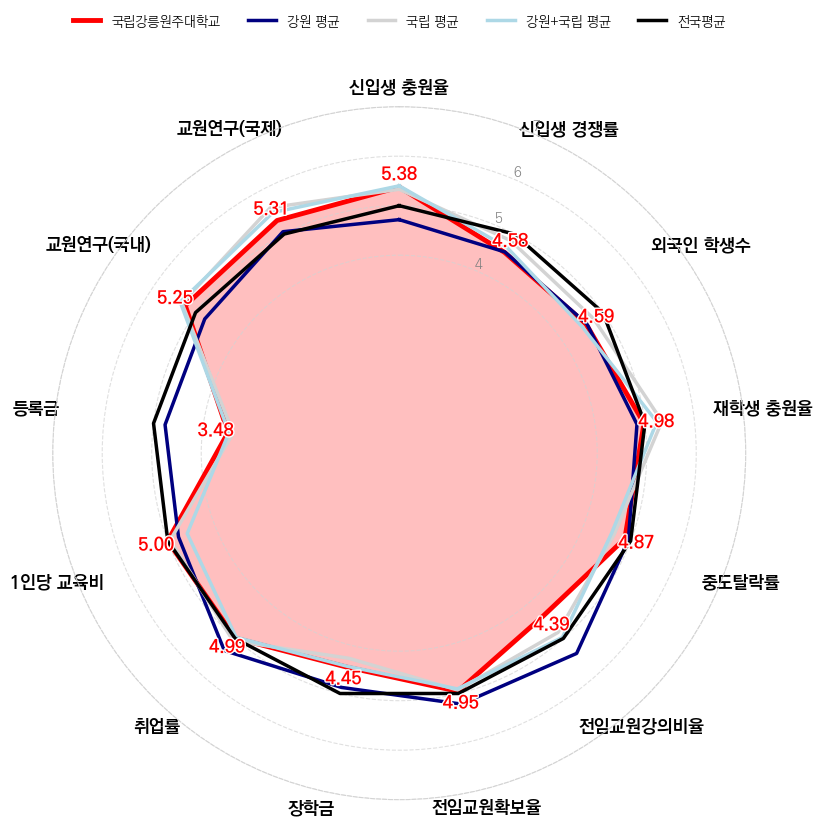

In [335]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

# -----------------------------
# 한글 폰트 설정
# -----------------------------
font_path = r"C:\Users\윤서현\Downloads\KoPubWorld Dotum_Pro Medium.otf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# -----------------------------
# 데이터 준비 (강릉원주대 예시)
# -----------------------------
school_name = "국립강릉원주대학교"
row = df_result[df_result["학교"] == school_name].iloc[0]
school_region = row["지역"]
school_estab = row["설립구분"]


custom_order = ["신입생 충원율", "신입생 경쟁률", "외국인 학생수",  "재학생 충원율",
                "중도탈락률", "전임교원강의비율", "전임교원확보율", "장학금", "취업률", 
                "1인당 교육비", "등록금", "교원연구(국내)",
                "교원연구(국제)"]

labels = custom_order
num_vars = len(labels)

school_scores = row[[col + "_전국Z" for col in custom_order]].values
region_scores = row[[col + "_전국Z_지역평균" for col in custom_order]].values
estab_scores = row[[col + "_전국Z_설립평균" for col in custom_order]].values
region_estab_scores = row[[col + "_전국Z_지역설립평균" for col in custom_order]].values
nation_scores = np.array([5] * num_vars)  # 전국평균

scores_list = [school_scores, region_scores, estab_scores, region_estab_scores, nation_scores]
labels_list = [
    school_name,
    f"{school_region} 평균",
    f"{school_estab} 평균",
    f"{school_region}+{school_estab} 평균",
    "전국평균"
]

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# -----------------------------
# 레이더 차트 그리기
# -----------------------------
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

colors = {
    school_name : "#FF0000",        # 빨강
    f"{school_region} 평균": "#000080",    # 남색
    f"{school_estab} 평균": "#D3D3D3",    # 밝은회색
    f"{school_region}+{school_estab} 평균": "#ADD8E6", # 연한파랑
    "전국평균": "#000000"     # 검정
}

for scores, lab in zip(scores_list, labels_list):
    values = np.concatenate((scores, [scores[0]]))
    angle_vals = np.concatenate((angles, [angles[0]]))
    
    if lab == school_name:  # 선택 대학만 색 채우기 + 더 굵은 선
        ax.plot(angle_vals, values, label=lab, color=colors[lab], linewidth=3.5)
        ax.fill(angle_vals, values, alpha=0.25, color=colors[lab])
    else:  # 나머지는 선만
        ax.plot(angle_vals, values, label=lab, color=colors[lab], linewidth=2.5)

# -----------------------------
# 축 설정 (흰색 배경 + 연회색 격자 유지)
# -----------------------------
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=13, weight="bold")
ax.set_theta_offset(np.pi / 2)  # 90도 회전
ax.set_theta_direction(-1)

ax.set_yticks([4, 5, 6, 7])
ax.set_yticklabels(["4", "5", "6", "7"], fontsize=10, color="gray")
ax.set_facecolor("white")

# 원형(동심원)만 남기기
ax.xaxis.grid(False)  # 세로선 제거
ax.yaxis.grid(True, linestyle="--", color="lightgray", alpha=0.7)
ax.spines['polar'].set_color("lightgray")
ax.spines['polar'].set_linestyle("--")

# -----------------------------
# 대학 점수값 표시 (빨강 + 흰색 윤곽선)
# -----------------------------
for angle, score in zip(angles, school_scores):
    txt = ax.text(angle, score + 0.25, f"{score:.2f}",
                  ha="center", va="center",
                  fontsize=13, color="red", weight="bold")
    txt.set_path_effects([path_effects.Stroke(linewidth=2, foreground="white"),
                          path_effects.Normal()])

# -----------------------------
# 제목 & 범례
# -----------------------------
# plt.title(f"{school_name} 레이더 차트", size=18, weight="bold", pad=40)
# ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.1))
ax.legend(
    loc="upper center", 
    bbox_to_anchor=(0.5, 1.15),
    ncol = 5,
    title=None,     # 범례 제목 제거
    frameon=False   # (선택) 범례 박스 테두리 제거
)


plt.show()


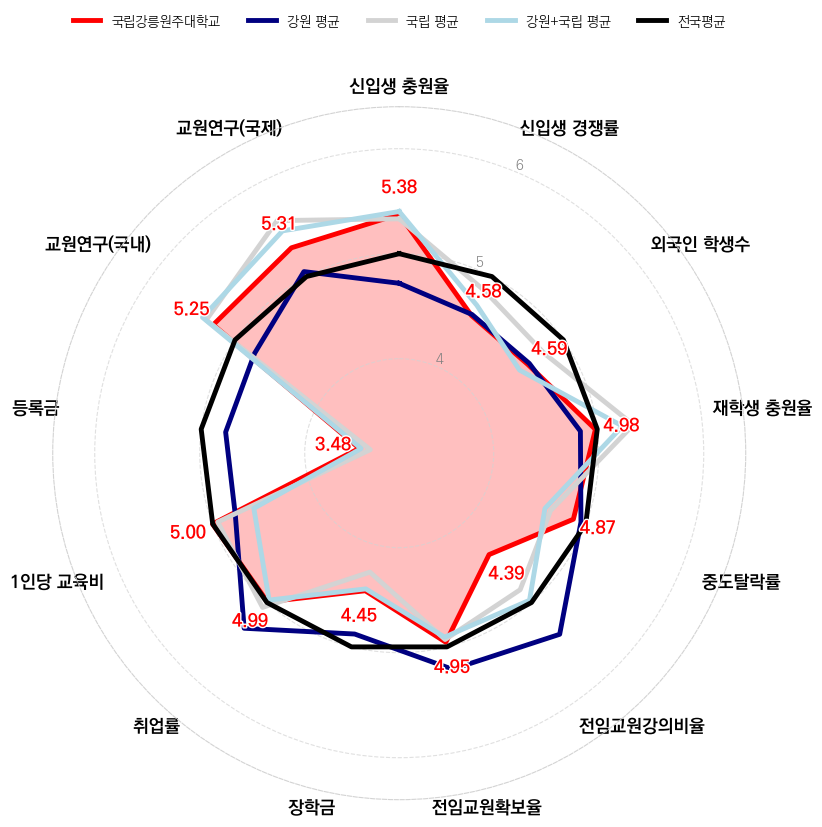

In [336]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

# -----------------------------
# 한글 폰트 설정
# -----------------------------
font_path = r"C:\Users\윤서현\Downloads\KoPubWorld Dotum_Pro Medium.otf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# -----------------------------
# 데이터 준비 (강릉원주대 예시)
# -----------------------------
school_name = "국립강릉원주대학교"
row = df_result[df_result["학교"] == school_name].iloc[0]
school_region = row["지역"]
school_estab = row["설립구분"]



custom_order = ["신입생 충원율", "신입생 경쟁률", "외국인 학생수",  "재학생 충원율",
                "중도탈락률", "전임교원강의비율", "전임교원확보율", "장학금", "취업률", 
                "1인당 교육비", "등록금", "교원연구(국내)",
                "교원연구(국제)"]

labels = custom_order
num_vars = len(labels)

school_scores = row[[col + "_전국Z" for col in custom_order]].values
region_scores = row[[col + "_전국Z_지역평균" for col in custom_order]].values
estab_scores = row[[col + "_전국Z_설립평균" for col in custom_order]].values
region_estab_scores = row[[col + "_전국Z_지역설립평균" for col in custom_order]].values
nation_scores = np.array([5] * num_vars)  # 전국평균

scores_list = [school_scores, region_scores, estab_scores, region_estab_scores, nation_scores]
labels_list = [
    school_name,
    f"{school_region} 평균",
    f"{school_estab} 평균",
    f"{school_region}+{school_estab} 평균",
    "전국평균"
]

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# -----------------------------
# 레이더 차트 그리기
# -----------------------------
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

colors = {
    school_name : "#FF0000",        # 빨강
    f"{school_region} 평균": "#000080",    # 남색
    f"{school_estab} 평균": "#D3D3D3",    # 밝은회색
    f"{school_region}+{school_estab} 평균": "#ADD8E6", # 연한파랑
    "전국평균": "#000000"     # 검정
}

for scores, lab in zip(scores_list, labels_list):
    values = np.concatenate((scores, [scores[0]]))
    angle_vals = np.concatenate((angles, [angles[0]]))
    
    if lab == school_name:  # 선택 대학만 색 채우기 + 더 굵은 선
        ax.plot(angle_vals, values, label=lab, color=colors[lab], linewidth=3.5)
        ax.fill(angle_vals, values, alpha=0.25, color=colors[lab])
    else:  # 나머지는 선만
        ax.plot(angle_vals, values, label=lab, color=colors[lab], linewidth=3.5)

# -----------------------------
# 축 설정 (흰색 배경 + 연회색 격자 유지)
# -----------------------------
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=13, weight="bold")
ax.set_theta_offset(np.pi / 2)  # 90도 회전
ax.set_theta_direction(-1)

ax.set_facecolor("white")
ax.set_ylim(3.1, 6.4) #y축 변경

ax.set_yticks([4, 5, 6])
ax.set_yticklabels(["4", "5", "6"], fontsize=10, color="gray")
ax.set_facecolor("white")



# 원형(동심원)만 남기기
ax.xaxis.grid(False)  # 세로선 제거
ax.yaxis.grid(True, linestyle="--", color="lightgray", alpha=0.7)
ax.spines['polar'].set_color("lightgray")
ax.spines['polar'].set_linestyle("--")

# -----------------------------
# 대학 점수값 표시 (빨강 + 흰색 윤곽선)
# -----------------------------
for angle, score in zip(angles, school_scores):
    txt = ax.text(angle, score + 0.25, f"{score:.2f}",
                  ha="center", va="center",
                  fontsize=13, color="red", weight="bold")
    txt.set_path_effects([path_effects.Stroke(linewidth=2, foreground="white"),
                          path_effects.Normal()])
for label in ax.get_xticklabels():
    label.set_zorder(10)  # 제일 앞에
    label.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground="white"),
        path_effects.Normal()
    ])
# -----------------------------
# 제목 & 범례
# -----------------------------
# plt.title(f"{school_name} 레이더 차트", size=18, weight="bold", pad=40)
# ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.1))
ax.legend(
    loc="upper center", 
    bbox_to_anchor=(0.5, 1.15),
    ncol = 5,
    title=None,     # 범례 제목 제거
    frameon=False   # (선택) 범례 박스 테두리 제거
)


plt.show()


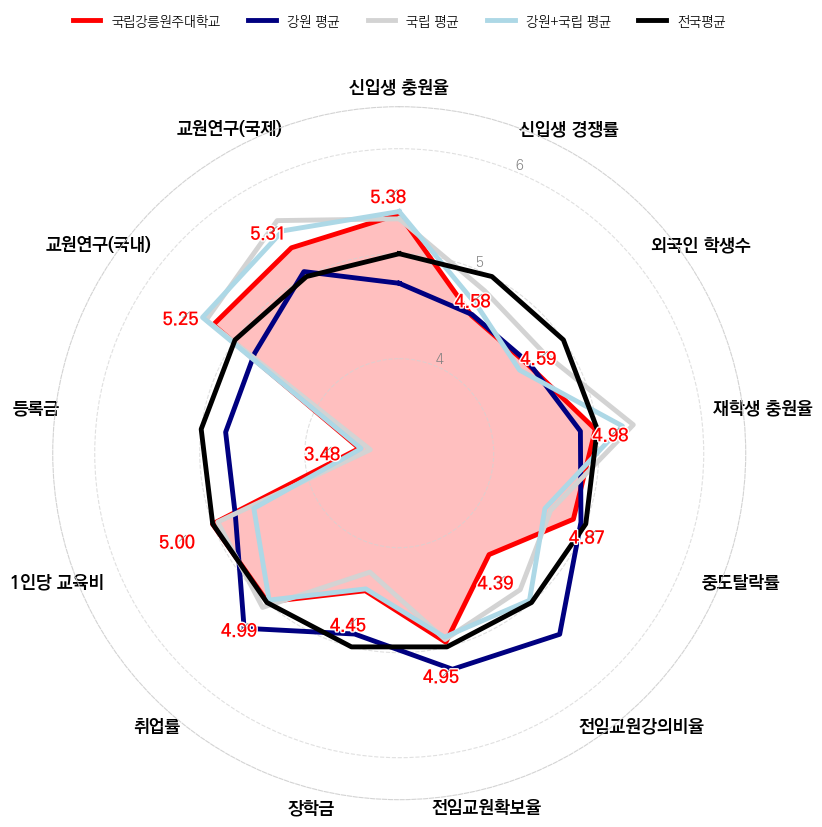

In [337]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects
from adjustText import adjust_text

# -----------------------------
# 한글 폰트 설정
# -----------------------------
font_path = r"C:\Users\윤서현\Downloads\KoPubWorld Dotum_Pro Medium.otf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# -----------------------------
# 데이터 준비 (강릉원주대 예시)
# -----------------------------
school_name = "국립강릉원주대학교"
row = df_result[df_result["학교"] == school_name].iloc[0]
school_region = row["지역"]
school_estab = row["설립구분"]


custom_order = ["신입생 충원율", "신입생 경쟁률", "외국인 학생수",  "재학생 충원율",
                "중도탈락률", "전임교원강의비율", "전임교원확보율", "장학금", "취업률", 
                "1인당 교육비", "등록금", "교원연구(국내)",
                "교원연구(국제)"]

labels = custom_order
num_vars = len(labels)

school_scores = row[[col + "_전국Z" for col in custom_order]].values
region_scores = row[[col + "_전국Z_지역평균" for col in custom_order]].values
estab_scores = row[[col + "_전국Z_설립평균" for col in custom_order]].values
region_estab_scores = row[[col + "_전국Z_지역설립평균" for col in custom_order]].values
nation_scores = np.array([5] * num_vars)  # 전국평균

scores_list = [school_scores, region_scores, estab_scores, region_estab_scores, nation_scores]
labels_list = [
    school_name,
    f"{school_region} 평균",
    f"{school_estab} 평균",
    f"{school_region}+{school_estab} 평균",
    "전국평균"
]

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# -----------------------------
# 레이더 차트 그리기
# -----------------------------
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

colors = {
    school_name : "#FF0000",        # 빨강
    f"{school_region} 평균": "#000080",    # 남색
    f"{school_estab} 평균": "#D3D3D3",    # 밝은회색
    f"{school_region}+{school_estab} 평균": "#ADD8E6", # 연한파랑
    "전국평균": "#000000"     # 검정
}

for scores, lab in zip(scores_list, labels_list):
    values = np.concatenate((scores, [scores[0]]))
    angle_vals = np.concatenate((angles, [angles[0]]))
    
    if lab == school_name:  # 선택 대학만 색 채우기 + 더 굵은 선
        ax.plot(angle_vals, values, label=lab, color=colors[lab], linewidth=3.5)
        ax.fill(angle_vals, values, alpha=0.25, color=colors[lab])
    else:  # 나머지는 선만
        ax.plot(angle_vals, values, label=lab, color=colors[lab], linewidth=3.5)

# -----------------------------
# 축 설정 (흰색 배경 + 연회색 격자 유지)
# -----------------------------
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=13, weight="bold")
ax.set_theta_offset(np.pi / 2)  # 90도 회전
ax.set_theta_direction(-1)

ax.set_facecolor("white")
ax.set_ylim(3.1, 6.4) # y축 변경

ax.set_yticks([4, 5, 6])
ax.set_yticklabels(["4", "5", "6"], fontsize=10, color="gray")
ax.set_facecolor("white")

# 원형(동심원)만 남기기
ax.xaxis.grid(False)  # 세로선 제거
ax.yaxis.grid(True, linestyle="--", color="lightgray", alpha=0.7)
ax.spines['polar'].set_color("lightgray")
ax.spines['polar'].set_linestyle("--")

# -----------------------------
# 대학 점수값 표시 (빨강 + 흰색 윤곽선, adjustText 적용)
# -----------------------------
texts = []
for angle, score in zip(angles, school_scores):
    txt = ax.text(angle, score + 0.25, f"{score:.2f}",
                  ha="center", va="center",
                  fontsize=13, color="red", weight="bold")
    txt.set_path_effects([path_effects.Stroke(linewidth=2, foreground="white"),
                          path_effects.Normal()])
    texts.append(txt)

# 자동으로 텍스트 겹침 방지
from adjustText import adjust_text
adjust_text(texts, ax=ax, expand_points=(1.2, 1.4), arrowprops=dict(arrowstyle="-", color="gray", lw=0.5))

# -----------------------------
# 제목 & 범례
# -----------------------------
ax.legend(
    loc="upper center", 
    bbox_to_anchor=(0.5, 1.15),
    ncol=5,
    title=None,     
    frameon=False
)

plt.show()
